<a href="https://colab.research.google.com/github/amalvarezme/SenalesSistemas/blob/master/3_SerieyTransformadaFourier/4_ModulacionAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación modulación por amplitud con detección coherente (AM) en Python

- La modulación se entiende como el proceso mediante el cual una señal mensaje se adecuda al medio de transmisión.

- En radiofrecuencia, la modulación básica consiste en manipular la amplitud de una señal de alta frecuencia, denominada portadora, respecto al mensaje.

- Dicho proceso se conoce como modulación por amplitud. Para más detalle ver [modulación AM](https://en.wikipedia.org/wiki/Amplitude_modulation).

- Se requiere entonces de una portadora (carrier) senoidal/cosenoidal:

$$c(t)=A_c\sin(2\pi F_c t)$$

- Para ilustrar el proceso, se trabaja con un mensaje tipo sen/cos:

$$m(t) = A_m \cos(2\pi F_m t)$$

- La modulación AM puede calibrarse en términos del índice de modulación:

$$I_m = \frac{Peak\{|m(t)|\}}{A_c}$$

 donde $Peak\{|m(t)|\}$ es el valor pico (máximo) de $|m(t)|$.



In [50]:
import numpy as np
import matplotlib.pyplot as plt
#Frecuencia portadora y muestreo

Fc = 100 #frecuencia de portadora

Fm = 10 #frecuencia del mensaje
Am = 1 #amplitud del mensaje


ti = 0
tf = 5/Fm #cantidad de periodos a graficar de la

Fs = 5*Fc #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo
m = Am*np.sinc(2*np.pi*Fm*(t-0.5*tf)/np.pi)#Am*np.cos(2*np.pi*Fm*t) #mensaje

Im = 0.8 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)

1.25


- Se grafican las señales mensaje y portadora:

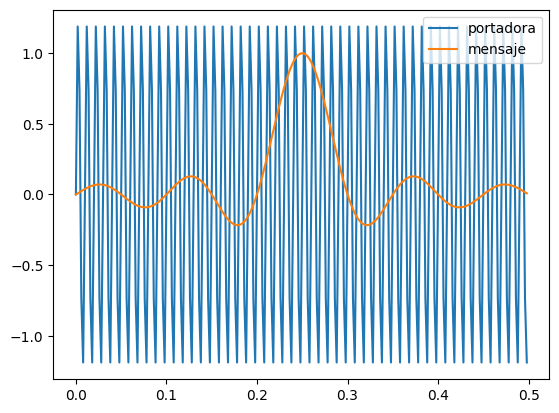

In [51]:
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()

- La señal a transmitir, señal modulada, en AM se cálcula como:

$$y(t)= \left(1+\frac{m(t)}{A_c}\right)c(t)$$

In [52]:
y = (1+m/Ac)*c #señal modulada en AM

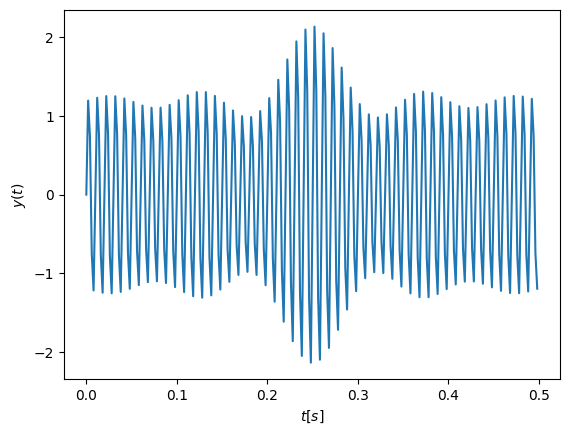

In [53]:
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

- A continuación, se presenta el espectro de la señal mensaje, portadora y modulada.

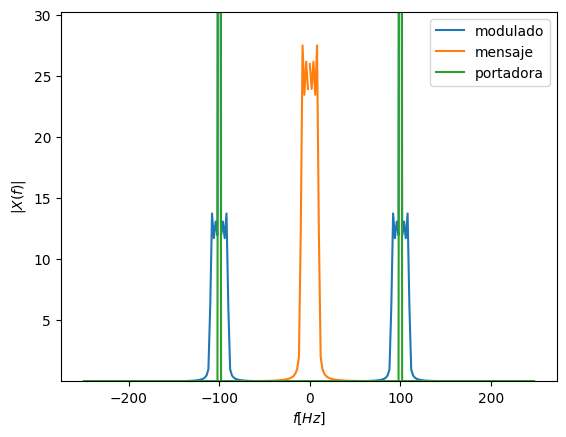

In [54]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()